### Multiple liner regression 
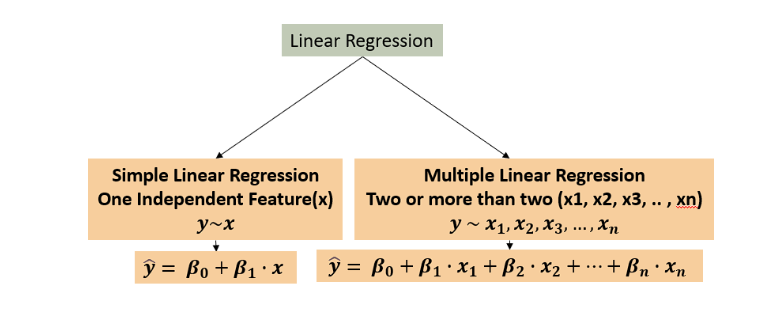


In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
import pandas as pd
df=pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Profit ~ RND, Admin, MKT

### Step 2  Perform basic quality check. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

### There are no missing or duplicate values, hence data is clean.

### Step 3 Seperate X and Y(Profit)

In [13]:
x=df[['RND','ADMIN','MKT']]
y=df[['PROFIT']]

In [14]:
x.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [15]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Proft_pred = B0+B1xRND + B2xAdmin + B3xMKT

### Step 4 Build a liner regression model 

In [17]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x, y)

LinearRegression()

### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.


### Getting coefficent and intercept

In [18]:
model.intercept_

array([50122.19298987])

In [19]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [20]:
x.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

### Proft_pred = 50122.1929 + 0.805715 X RND - 0.028815 X Admin + 0.02722806
### RND has highest impact on Profit
### Admin and MKT dose not have major impact on Profit

### Evaluate the model 

In [21]:
# R score 
model.score(x, y)

0.9507459940683246

### Predict the result for X 

In [23]:
ypred=model.predict(x)
ypred[0:5]

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327]])

In [24]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Get other metrics

In [25]:
from sklearn.metrics import mean_squared_error , mean_absolute_error, mean_absolute_percentage_error, r2_score

In [27]:
mes=mean_squared_error(y, ypred)
mes

78417126.01913083

In [28]:
rmse = mes ** (1/2)
rmse

8855.34448901514

In [29]:
mae=mean_absolute_error(y,ypred)
mae

6471.4503961048085

In [30]:
mape = mean_absolute_percentage_error(y,ypred)
mape

0.10601209160494125

In [31]:
r2=r2_score(y, ypred)
r2

0.9507459940683246

### Because R2 Score is 0.9507 > 0.8 hence model is good, can be used for out of sample prediction

### Out of sample predications

In [32]:
x.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [33]:
x.values[0:5]

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42]])

In [34]:
# RND, ADMIN, MKT
rnd=100000
admin = 60000
mkt = 120000

xnew= [[rnd,admin,mkt]]
model.predict(xnew)

array([[132352.10765385]])